# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [188]:
# Libraries
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd



## Challenge 1

#### The data we will use in this challenge is:

In [189]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

<function matplotlib.pyplot.show(close=None, block=None)>

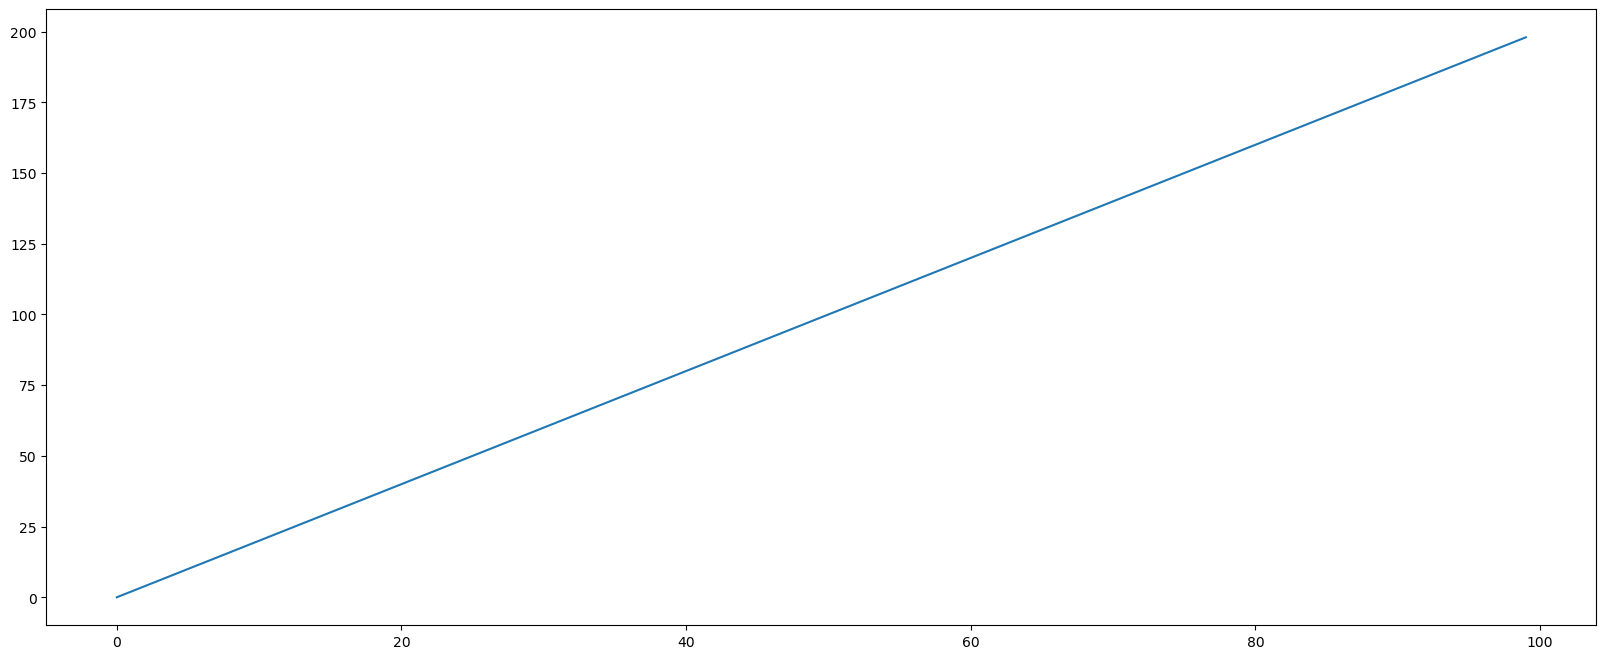

In [19]:
plt.figure(figsize=(20,8))
plt.plot(x,y)
#plt.ylablel("Height cm", size = 20, rotation=10)
#plt.xlabel("Age (years)", size= 20)
plt.show

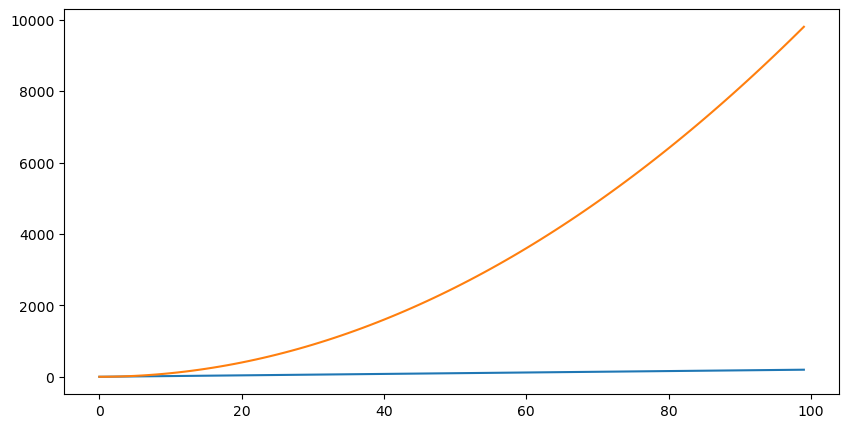

In [26]:
plt.subplots(figsize=(10,5))
a = plt.plot(x,y)
b = plt.plot(x,z)


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

<function matplotlib.pyplot.show(close=None, block=None)>

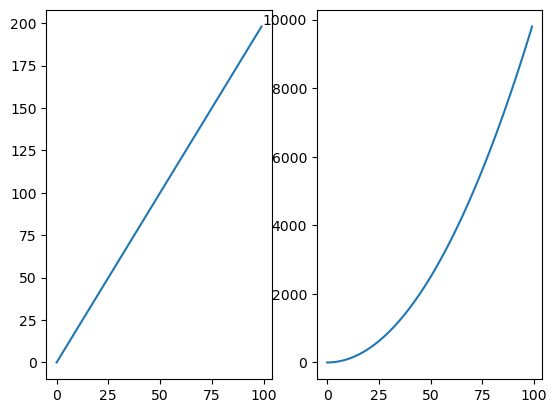

In [190]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(x, y)
axes[1].plot(x, z)
plt.show

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

TypeError: tuple indices must be integers or slices, not tuple

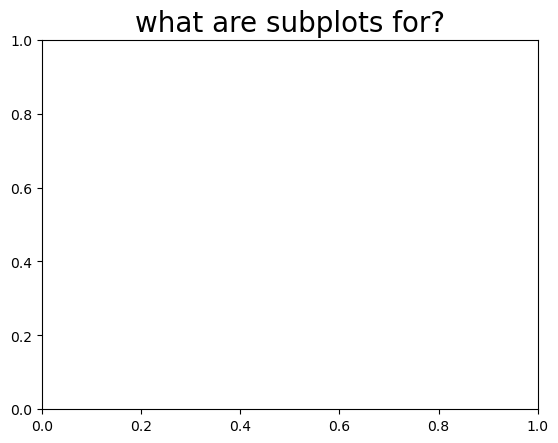

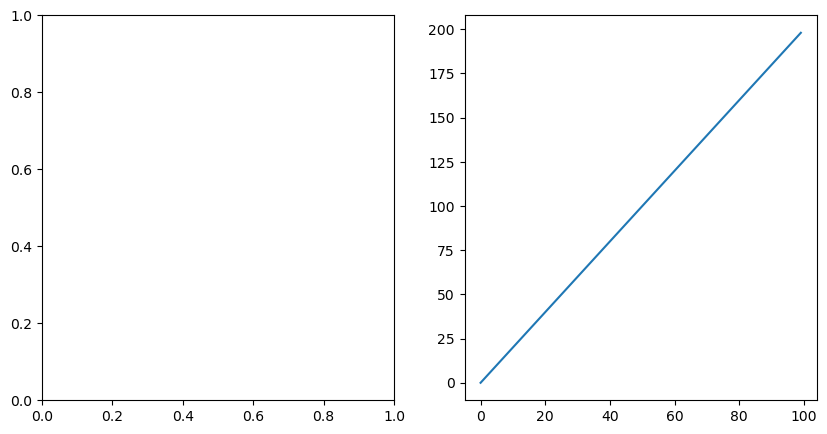

In [44]:
plt.title("what are subplots for?", size = 20)
ax = plt.subplots(1,2, figsize = (10,5))
plt.plot(x,y)


ax[0, 0].plot(x, y, color='red')
ax[0, 1].plot(x, z, color='blue')
#ax[1, 0].plot(x, y, color='green')
#ax[1, 1].plot(x, y, color='purple')


#plt.title("Very Important Chart", size= 20)
#plt.ylabel("Attention span", size = 15, rotation=30)
#plt.xlabel("Number of sql mentions", size=15)


#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

In [ ]:
plt.subplots(figsize=(10,5))
a = plt.plot(x,y)
b = plt.plot(x,z)


##### ???????

#### As a bonus challenge, try to add a legend to the plot.

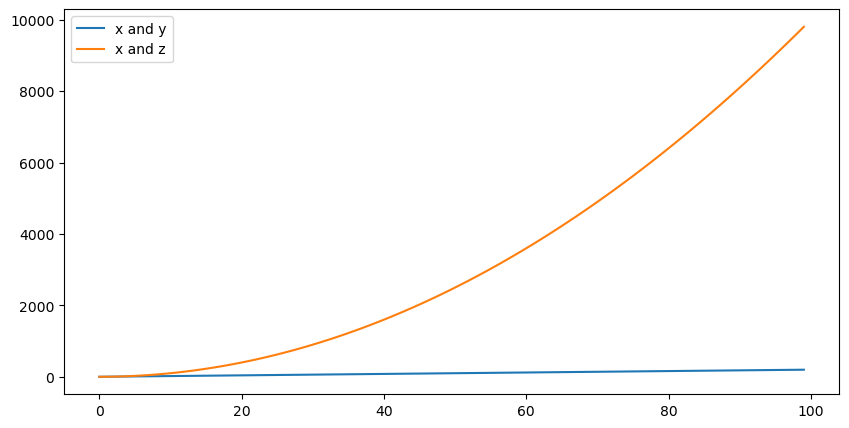

In [45]:
plt.subplots(figsize=(10,5))
a = plt.plot(x,y, label="x and y")
b = plt.plot(x,z, label="x and z")
plt.legend()      

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [50]:
fitbit = pd.read_csv("Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [53]:
fitbit.shape

(367, 24)

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [71]:
fitbit.dtypes

Date                           object
Calorie burned                  int64
Steps                           int64
Distance                      float64
Floors                          int64
Minutes Sedentary             float64
Minutes Lightly Active          int64
Minutes Fairly Active           int64
Minutes Very Active             int64
Activity Calories               int64
MinutesOfSleep                  int64
MinutesOfBeingAwake             int64
NumberOfAwakings                int64
LengthOfRestInMinutes           int64
Distance_miles                float64
Days                           object
Days_encoded                  float64
Work_or_Weekend                 int64
Hours Sleep                   float64
Sleep efficiency              float64
Yesterday_sleep               float64
Yesterday_sleep_efficiency    float64
Months                         object
Months_encoded                  int64
dtype: object

In [73]:
fitbit["Date"] = fitbit["Date"].astype('datetime64[ns]')
fitbit.dtypes

Date                          datetime64[ns]
Calorie burned                         int64
Steps                                  int64
Distance                             float64
Floors                                 int64
Minutes Sedentary                    float64
Minutes Lightly Active                 int64
Minutes Fairly Active                  int64
Minutes Very Active                    int64
Activity Calories                      int64
MinutesOfSleep                         int64
MinutesOfBeingAwake                    int64
NumberOfAwakings                       int64
LengthOfRestInMinutes                  int64
Distance_miles                       float64
Days                                  object
Days_encoded                         float64
Work_or_Weekend                        int64
Hours Sleep                          float64
Sleep efficiency                     float64
Yesterday_sleep                      float64
Yesterday_sleep_efficiency           float64
Months    

In [96]:
# MEDIAN STEPS BY MONTH_ENCODED
mean_steps_month = fitbit.groupby(fitbit['Date'].dt.strftime('%B'))['Steps'].mean()
mean_steps_month



# MEDIAN STEPS BY WORK_OR_WEEKEND        #### not working

#fitbit["DayOfWeek"] = fitbit["Date"].dt.weekday
#fitbit["Weekend"] = fitbit["DayOfWeek"] >= 5

#fitbit.groupby(["Weekend"]).agg({fitbit["Steps"]})


Date
April        13079.033333
August       11584.774194
December      8470.064516
February      8922.866667
January       9892.064516
July          9193.322581
June         12536.166667
March        10312.935484
May          10620.096774
November      9467.466667
October       8272.451613
September     9191.333333
Name: Steps, dtype: float64

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

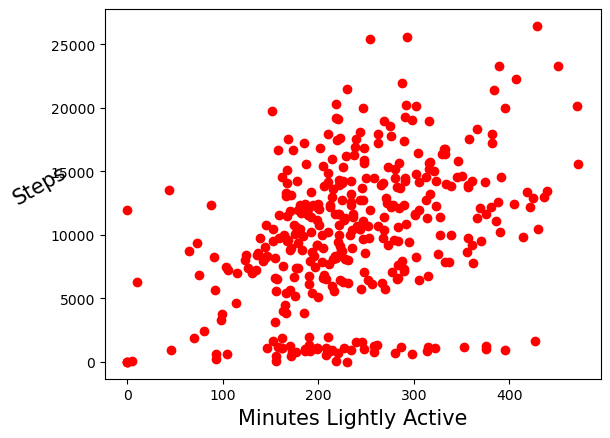

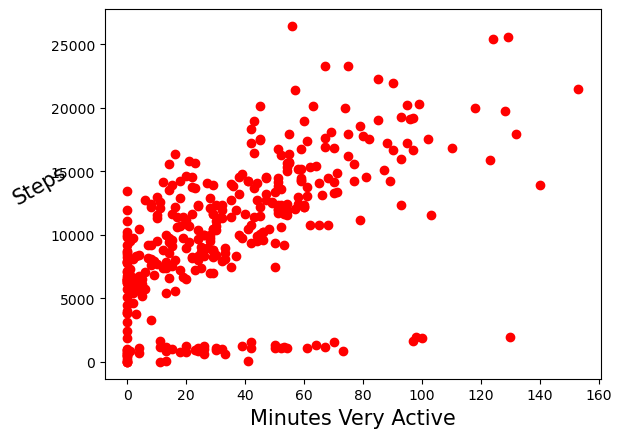

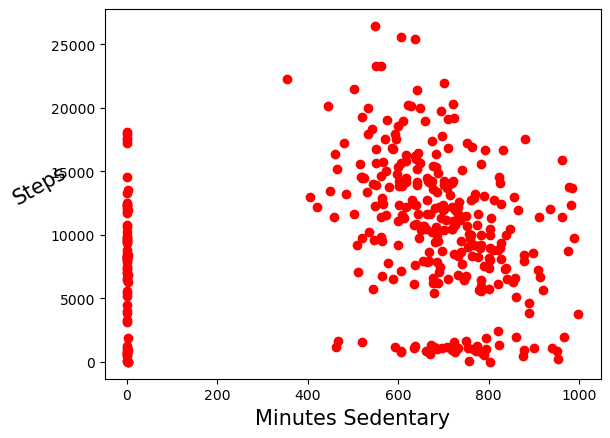

In [93]:
activity = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]

for x in activity:
    plt.plot(fitbit[x], fitbit["Steps"], "ro")
    plt.ylabel("Steps", size = 15, rotation=30)
    plt.xlabel(x, size=15)
    plt.show()

# plt.plot(fitbit["Minutes Lightly Active"], fitbit["Steps"])

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [56]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [60]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [63]:
# NUMERICAL VARIABLES

titanic.select_dtypes(include="number")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [64]:
# CATEGORICAL VARIABLES

titanic.select_dtypes(exclude="number")

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

<Figure size 1200x600 with 0 Axes>

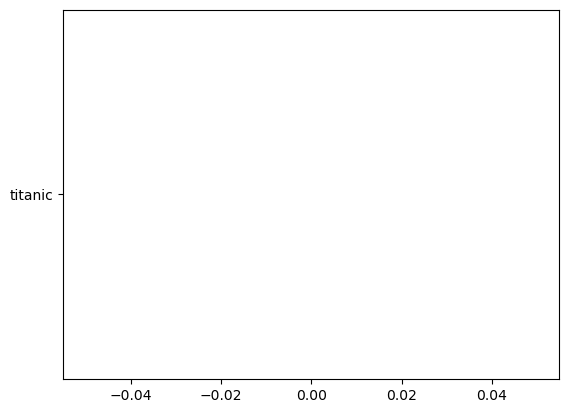

<Figure size 1200x600 with 0 Axes>

In [67]:

##### HELP!


plt.plot("titanic")
plt.figure(figsize= (12,6))

In [100]:
titanic.head()


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Use the right visulalization to show the distribution of column `Age`.

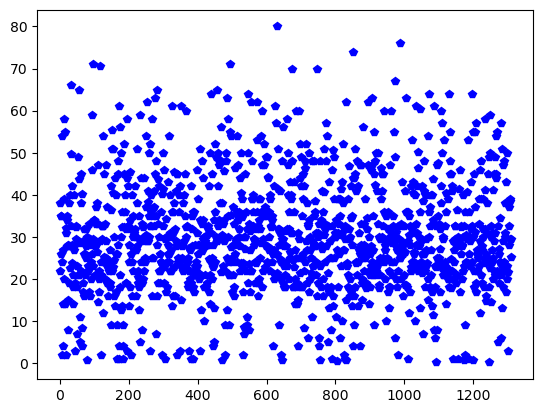

In [105]:

plt.plot(titanic["PassengerId"], titanic["Age"], "bp")

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

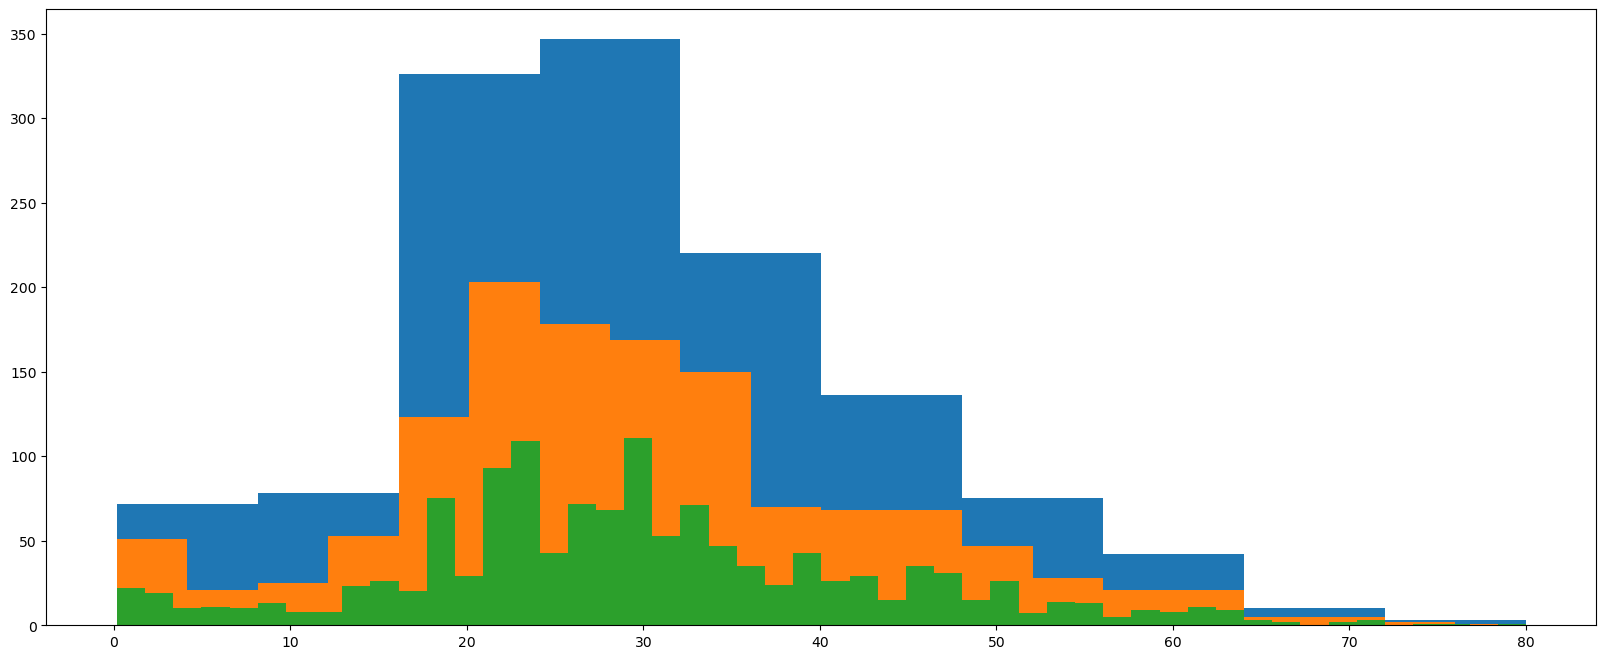

In [126]:
plt.figure(figsize = (20,8))
plt.hist(titanic["Age"], 10)
plt.hist(titanic["Age"], 20)
plt.hist(titanic["Age"], 50)
plt.show()



##### Do not think i get it

ValueError: 'label' must be of length 'x'

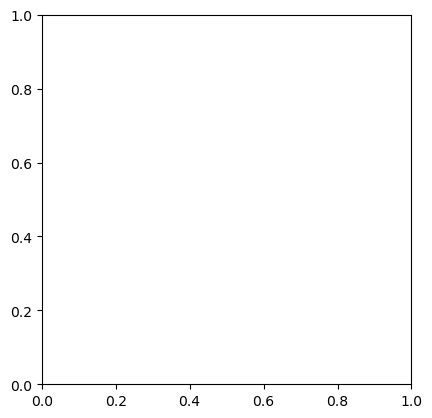

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""

#### Use seaborn to show the distribution of column `Age`.

In [ ]:
# your code here

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

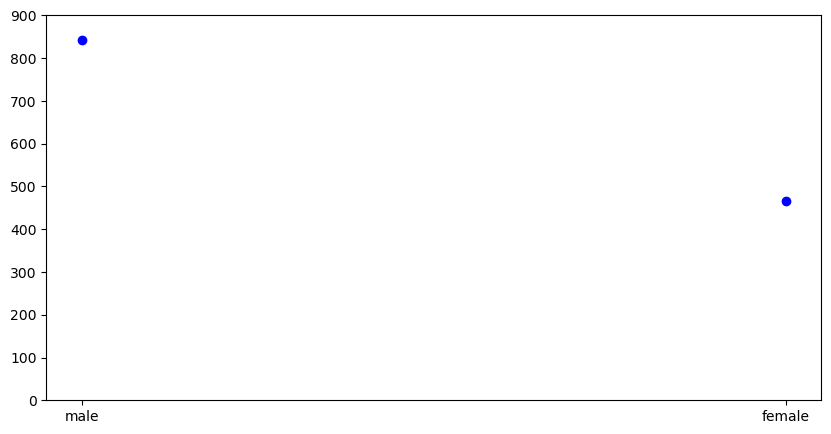

In [155]:
# Method 1 - matplotlib

male = titanic.groupby("Gender").agg({"Gender":"count"})

plt.figure(figsize=(10,5))
plt.ylim(0,900)
plt.plot(titanic["Gender"].value_counts(), "bo")

In [140]:
titanic["Gender"].value_counts()

male      843
female    466
Name: Gender, dtype: int64

In [ ]:
# Method 2 - seaborn
# your code here

#### Use the right plot to visualize the column `Pclass`.

In [156]:
titanic["Pclass"].unique()

array([3, 1, 2])

In [165]:
classes = titanic.groupby("Pclass").agg({titanic["Pclass"].unique()})

TypeError: unhashable type: 'numpy.ndarray'

([<matplotlib.axis.XTick at 0x283305b40>,
 [Text(1, 0, 'First Class'),
  Text(2, 0, 'Second Class'),
  Text(4, 0, 'Third Class')])

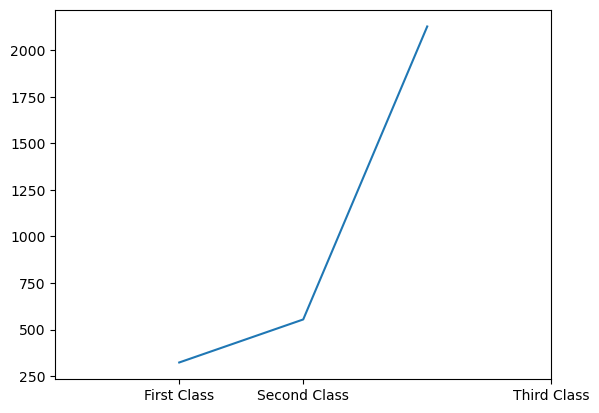

In [172]:
classes = titanic.groupby("Pclass").agg({"Pclass": "sum"})

plt.plot(classes)
plt.xlim(0,2.5)
plt.xticks([1,2,4],["First Class", "Second Class", "Third Class"])

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [178]:
stats = titanic["Age"].describe()

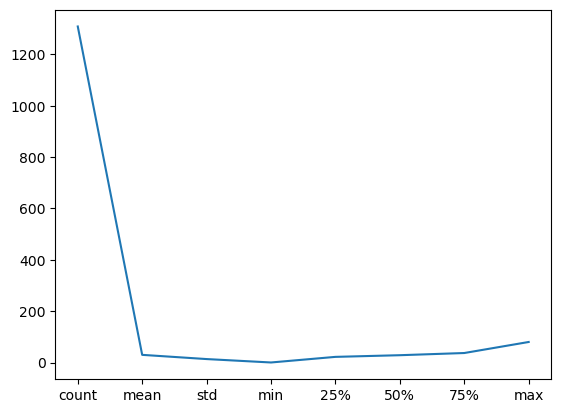

In [181]:
plt.plot(stats)


In [ ]:
"""
it should not include the count with the other values.
it would be nice to have a bar chart
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
## an histogram??


#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here